## Energy Efficiency

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_excel("Practice dataset.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


#### Exploratory Data Analysis

In [3]:
df.shape

(768, 10)

In [4]:
# Check for missing values
print(df.isnull().sum())

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


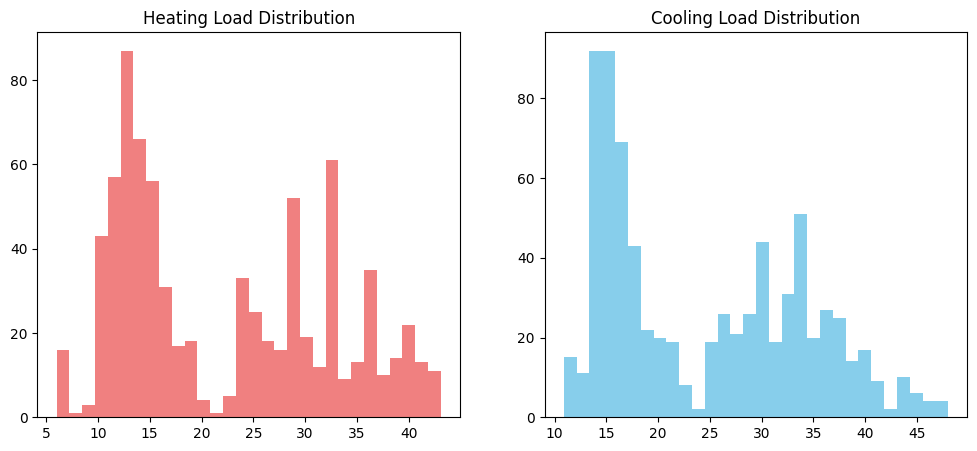

In [5]:
# Visualize the distribution of target variables
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Y1'], bins=30, color='lightcoral')
plt.title('Heating Load Distribution')
plt.subplot(1, 2, 2)
plt.hist(df['Y2'], bins=30, color='skyblue')
plt.title('Cooling Load Distribution')
plt.show()

In [6]:
df.describe(include='all')

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


#### Column Renaming

In [7]:
df = df.rename(columns={'X1': 'Relative Compactness', 'X2':'Surface Area','X3':'Wall Area','X4': 'Roof Area', 'X5':'Overall Height', 'X6':'Orientation', 'X7':'Glazing Area', 'X8':'Glazing Area Distribution', 'Y1':'Heating Load', 'Y2':'Cooling Load'})
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
# Feature variables
X = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
    'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
# Target variables
y1 = df['Heating Load']
y2 = df['Cooling Load']

In [9]:
# Split data for Heating Load
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
# Split data for Cooling Load
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)

#### Ridge Regression

In [10]:
ridge = Ridge()
alpha_values = {'alpha': np.logspace(-3, 3, 10)}

In [11]:
# Ridge Regression for Heating Load
ridge_cv1 = GridSearchCV(ridge, alpha_values, cv=5, scoring='neg_mean_squared_error')
ridge_cv1.fit(X_train1, y_train1)

# Predictions and Evaluation for Heating Load
best_ridge1 = ridge_cv1.best_estimator_
y_pred_ridge1 = best_ridge1.predict(X_test1)
rmse_ridge1 = np.sqrt(mean_squared_error(y_test1, y_pred_ridge1))
print(f"Heating Load - Ridge Regression")
print(f"Best alpha value: {ridge_cv1.best_params_['alpha']}")
print(f"RMSE: {rmse_ridge1:.2f}")
print(f"R2 Score: {r2_score(y_test1, y_pred_ridge1):.2f}")

# Ridge Regression for Cooling Load
ridge_cv2 = GridSearchCV(ridge, alpha_values, cv=5, scoring='neg_mean_squared_error')
ridge_cv2.fit(X_train2, y_train2)

# Predictions and Evaluation for Cooling Load
best_ridge2 = ridge_cv2.best_estimator_
y_pred_ridge2 = best_ridge2.predict(X_test2)
rmse_ridge2 = np.sqrt(mean_squared_error(y_test2, y_pred_ridge2))
print(f"\nCooling Load - Ridge Regression")
print(f"Best alpha value: {ridge_cv2.best_params_['alpha']}")
print(f"RMSE: {rmse_ridge2:.2f}")
print(f"R2 Score: {r2_score(y_test2, y_pred_ridge2):.2f}")

Heating Load - Ridge Regression
Best alpha value: 0.001
RMSE: 3.03
R2 Score: 0.91

Cooling Load - Ridge Regression
Best alpha value: 0.001
RMSE: 3.15
R2 Score: 0.89


#### Lasso Regression

In [12]:
lasso = Lasso()

In [13]:
# Lasso Regression for Heating Load
lasso_cv1 = GridSearchCV(lasso, alpha_values, cv=5, scoring='neg_mean_squared_error')
lasso_cv1.fit(X_train1, y_train1)

# Predictions and Evaluation for Heating Load
best_lasso1 = lasso_cv1.best_estimator_
y_pred_lasso1 = best_lasso1.predict(X_test1)
rmse_lasso1 = np.sqrt(mean_squared_error(y_test1, y_pred_lasso1))
print(f"\nHeating Load - Lasso Regression")
print(f"Best alpha value: {lasso_cv1.best_params_['alpha']}")
print(f"RMSE: {rmse_lasso1:.2f}")
print(f"R2 Score: {r2_score(y_test1, y_pred_lasso1):.2f}")

# Lasso Regression for Cooling Load
lasso_cv2 = GridSearchCV(lasso, alpha_values, cv=5, scoring='neg_mean_squared_error')
lasso_cv2.fit(X_train2, y_train2)

# Predictions and Evaluation for Cooling Load
best_lasso2 = lasso_cv2.best_estimator_
y_pred_lasso2 = best_lasso2.predict(X_test2)
rmse_lasso2 = np.sqrt(mean_squared_error(y_test2, y_pred_lasso2))
print(f"\nCooling Load - Lasso Regression")
print(f"Best alpha value: {lasso_cv2.best_params_['alpha']}")
print(f"RMSE: {rmse_lasso2:.2f}")
print(f"R2 Score: {r2_score(y_test2, y_pred_lasso2):.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.228e+02, tolerance: 4.917e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.631e+01, tolerance: 4.966e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.167e+02, tolerance: 4.813e


Heating Load - Lasso Regression
Best alpha value: 0.001
RMSE: 3.03
R2 Score: 0.91

Cooling Load - Lasso Regression
Best alpha value: 0.001
RMSE: 3.15
R2 Score: 0.89


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.472e+02, tolerance: 5.505e+00
  model = cd_fast.enet_coordinate_descent(


#### Visualisation of Ridge and Lasso Regression

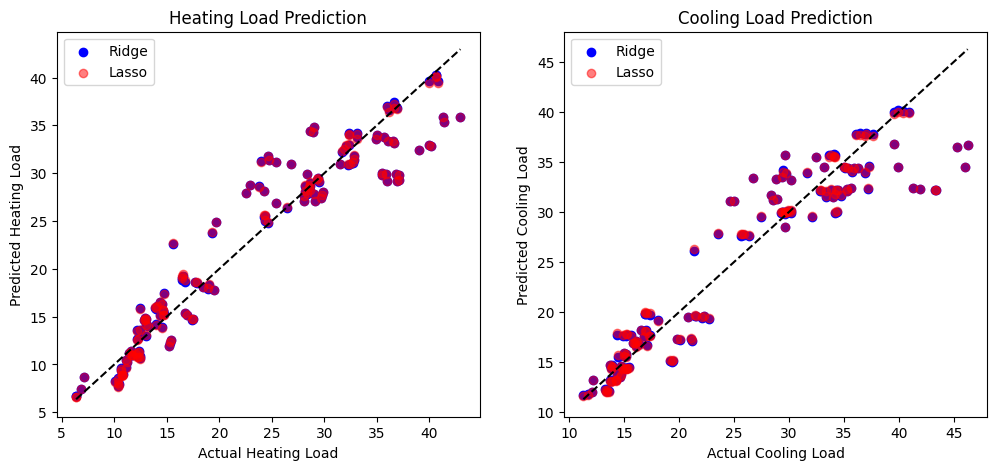

In [14]:
# Ridge vs Lasso Comparison for Heating Load
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test1, y_pred_ridge1, color='blue', label='Ridge')
plt.scatter(y_test1, y_pred_lasso1, color='red', label='Lasso', alpha=0.5)
plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], color='black', linestyle='--')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Heating Load Prediction')
plt.legend()

# Ridge vs Lasso Comparison for Cooling Load
plt.subplot(1, 2, 2)
plt.scatter(y_test2, y_pred_ridge2, color='blue', label='Ridge')
plt.scatter(y_test2, y_pred_lasso2, color='red', label='Lasso', alpha=0.5)
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='black', linestyle='--')
plt.xlabel('Actual Cooling Load')
plt.ylabel('Predicted Cooling Load')
plt.title('Cooling Load Prediction')
plt.legend()
plt.show()

In [15]:
# Feature Coefficients for Heating Load
print("\nHeating Load - Lasso Coefficients")
for feature_name, coef in zip(X.columns, best_lasso1.coef_):
    print(f"Feature: {feature_name}, Coefficient: {coef}")

# Feature Coefficients for Cooling Load
print("\nCooling Load - Lasso Coefficients")
for feature_name, coef in zip(X.columns, best_lasso2.coef_):
    print(f"Feature: {feature_name}, Coefficient: {coef}")


Heating Load - Lasso Coefficients
Feature: Relative Compactness, Coefficient: -52.605911137632155
Feature: Surface Area, Coefficient: -0.06480398823045869
Feature: Wall Area, Coefficient: 0.05347820741498843
Feature: Roof Area, Coefficient: -0.010348894348998935
Feature: Overall Height, Coefficient: 4.311757167938368
Feature: Orientation, Coefficient: -0.03055485518451142
Feature: Glazing Area, Coefficient: 20.107925702683392
Feature: Glazing Area Distribution, Coefficient: 0.21248453753709526

Cooling Load - Lasso Coefficients
Feature: Relative Compactness, Coefficient: -61.8103952304079
Feature: Surface Area, Coefficient: -0.07429360331199952
Feature: Wall Area, Coefficient: 0.041731385349370355
Feature: Roof Area, Coefficient: -0.00807569510822555
Feature: Overall Height, Coefficient: 4.2342379842548175
Feature: Orientation, Coefficient: 0.055461065531980255
Feature: Glazing Area, Coefficient: 14.752726674741707
Feature: Glazing Area Distribution, Coefficient: 0.035127239570728046


#### ElasticNet Regression

In [16]:
from sklearn.linear_model import ElasticNet

elastic_net_y1 = ElasticNet(alpha=0.1, l1_ratio=0.5)  # 50% L1, 50% L2
elastic_net_y1.fit(X_train1, y_train1)

elastic_net_y2 = ElasticNet(alpha=0.1, l1_ratio=0.5)  # 50% L1, 50% L2
elastic_net_y2.fit(X_train2, y_train2)

ElasticNet(alpha=0.1)

In [17]:
# Predictions
y_pred_elastic_y1 = elastic_net_y1.predict(X_test1)

y_pred_elastic_y2 = elastic_net_y2.predict(X_test2)

In [18]:
# Evaluation for Heating Load
rmse1 = np.sqrt(mean_squared_error(y_test1, y_pred_elastic_y1))
print(f"\nHeating Load - ElasticNet Regression")
print(f"RMSE: {rmse1:.2f}")
print(f"R2 Score: {r2_score(y_test1, y_pred_elastic_y1):.2f}")

# Evaluation for Cooling Load
rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred_elastic_y2))
print(f"\nCooling Load - ElasticNet Regression")
print(f"RMSE: {rmse2:.2f}")
print(f"R2 Score: {r2_score(y_test2, y_pred_elastic_y2):.2f}")


Heating Load - ElasticNet Regression
RMSE: 3.66
R2 Score: 0.87

Cooling Load - ElasticNet Regression
RMSE: 3.62
R2 Score: 0.86


#### ElasticNet Visualisation

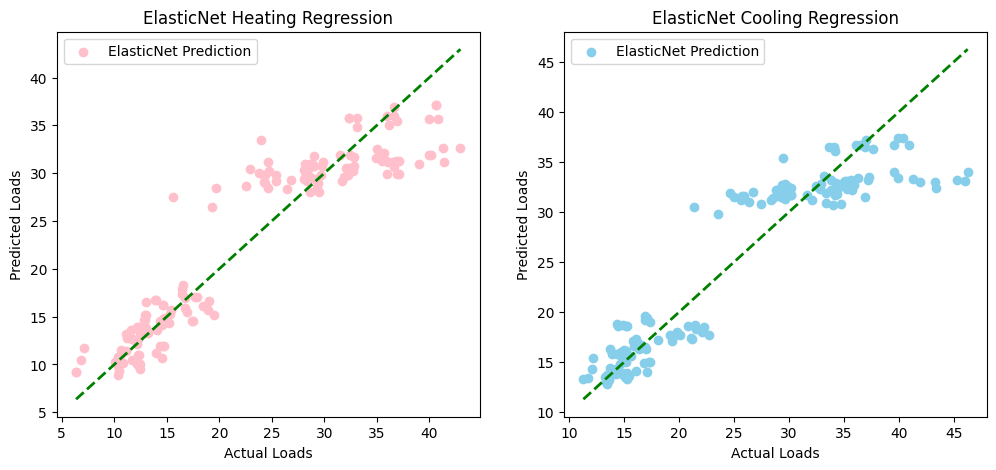

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test1, y_pred_elastic_y1, color='pink', label="ElasticNet Prediction")
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'g--', lw=2)
plt.xlabel('Actual Loads')
plt.ylabel("Predicted Loads")
plt.title("ElasticNet Heating Regression")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test2, y_pred_elastic_y2, color='skyblue', label="ElasticNet Prediction")
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'g--', lw=2)
plt.xlabel('Actual Loads')
plt.ylabel("Predicted Loads")
plt.title("ElasticNet Cooling Regression")
plt.legend()